In [2]:
%matplotlib inline

# Exercise 09: Web Scraping Wikipedia

I would like you to examine whether or not there is a linear correlation between the size of a US state and the year it was admitted to the union.

Objectives: 
+ Scraping a table from a webpage
+ Storing that data in a dataframe
+ Performing a linear regression on that data

## Part A
Using the URL I've provided below, I want you to scrape:
1. The name of each state
2. The year of admittance for each state
3. The land area for each state

Examine the URL to the webpage I've provided using your browser's element inspector to determine how to parse the relavent table.  

Store the data collected in a Pandas' DataFrame.

## Part B
Once you have scraped the necessary data, I would like you to perform a linear regression on the year of admittance for each state (x-axis) against the land area of each state (y-axis) using the Linear Regression model from scikit learn.

You may use the [API reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [this example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) to assist you with your regression.

Plot the data points and regression line.  Print out the coefficients, mean squared error, and $r^2$ values of this model.


In [1]:
import urllib
import matplotlib.pylab as plt
from bs4 import BeautifulSoup
import bs4
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [2]:
wiki_url='https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'
with urllib.request.urlopen(wiki_url) as response:
    territory = bs4.BeautifulSoup(response)
    

In [3]:
territory.title

<title>List of states and territories of the United States - Wikipedia</title>

In [4]:
all_tables = territory.find_all('table')

In [5]:
len(all_tables)

18

In [6]:
states_table = territory.findAll('table',
                           {'class':'wikitable sortable plainrowheaders'})
len(states_table)

4

In [7]:
states_table[0]


<table class="wikitable sortable plainrowheaders" style="text-align: center;">
<caption>States of the United States of America
</caption>
<tbody><tr>
<th colspan="2" rowspan="2" scope="col">Flag, name and<br/><a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a><sup class="reference" id="cite_ref-USPSabbreviations_14-0"><a href="#cite_note-USPSabbreviations-14">[12]</a></sup>
</th>
<th colspan="2" scope="col">Cities
</th>
<th rowspan="2" scope="col">Ratification or<br/>admission<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[C]</a></sup>
</th>
<th rowspan="2" scope="col">Population<br/><sup class="reference" id="cite_ref-17"><a href="#cite_note-17">[D]</a></sup><sup class="reference" id="cite_ref-AnnualEstUS_18-0"><a href="#cite_note-AnnualEstUS-18">[14]</a></sup>
</th>
<th colspan="2" scope="col">Total area<sup class="reference" id="cite_ref-areameasurements_19-0"><a href="#cite_note-aream

In [8]:
import requests

In [9]:
states = states_table[0].findAll('a')
states

[<a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a>,
 <a href="#cite_note-USPSabbreviations-14">[12]</a>,
 <a href="#cite_note-16">[C]</a>,
 <a href="#cite_note-17">[D]</a>,
 <a href="#cite_note-AnnualEstUS-18">[14]</a>,
 <a href="#cite_note-areameasurements-19">[15]</a>,
 <a href="#cite_note-areameasurements-19">[15]</a>,
 <a href="#cite_note-areameasurements-19">[15]</a>,
 <a href="/wiki/List_of_United_States_congressional_districts" title="List of United States congressional districts">Number<br/>of Reps.</a>,
 <a href="#cite_note-State_and_Local_Government_Finances_and_Employment-20">[16]</a>,
 <a href="/wiki/Alabama" title="Alabama">Alabama</a>,
 <a href="/wiki/Montgomery,_Alabama" title="Montgomery, Alabama">Montgomery</a>,
 <a href="/wiki/Birmingham,_Alabama" title="Birmingham, Alabama">Birmingham</a>,
 <a href="/wiki/Alaska" title="Alaska">Alaska</a>,
 <a href="/wiki/Juneau,_Alaska" title="Juneau

In [10]:
table_rows = states_table[0].find_all('tr')
table_rows

[<tr>
 <th colspan="2" rowspan="2" scope="col">Flag, name and<br/><a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a><sup class="reference" id="cite_ref-USPSabbreviations_14-0"><a href="#cite_note-USPSabbreviations-14">[12]</a></sup>
 </th>
 <th colspan="2" scope="col">Cities
 </th>
 <th rowspan="2" scope="col">Ratification or<br/>admission<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[C]</a></sup>
 </th>
 <th rowspan="2" scope="col">Population<br/><sup class="reference" id="cite_ref-17"><a href="#cite_note-17">[D]</a></sup><sup class="reference" id="cite_ref-AnnualEstUS_18-0"><a href="#cite_note-AnnualEstUS-18">[14]</a></sup>
 </th>
 <th colspan="2" scope="col">Total area<sup class="reference" id="cite_ref-areameasurements_19-0"><a href="#cite_note-areameasurements-19">[15]</a></sup>
 </th>
 <th colspan="2" scope="col">Land area<sup class="reference" id="cite_ref-areameasurements_19-1">

In [13]:
master_list = []
for n in range(len(table_rows)):
    col = table_rows[n].find_all('td')
    sublist = []
    for i in col:
        sublist.append(i.text.strip())
        master_list.append(sublist)
final = set([tuple(x) for x in master_list])
final = list(final)

In [14]:
import numpy as np
nosubrow = []
for m in final:
    m = np.array(m)
    if len(m) == 12:
        nosubrow.append(m[[0,3,7]])
    else:
        nosubrow.append(m[[0,2,6]])
        
print(nosubrow)

[array(['NC', 'Nov 21, 1789', '48,618'], dtype='<U12'), array(['WA', 'Nov 11, 1889', '66,456'], dtype='<U12'), array(['NH', 'Jun 21, 1788', '8,953'], dtype='<U12'), array(['KY', 'Jun 1, 1792', '39,486'], dtype='<U11'), array(['PA', 'Dec 12, 1787', '44,743'], dtype='<U12'), array(['VA', 'Jun 25, 1788', '39,490'], dtype='<U14'), array(['NJ', 'Dec 18, 1787', '7,354'], dtype='<U12'), array(['OH', 'Mar 1, 1803', '40,861'], dtype='<U11'), array(['NV', 'Oct 31, 1864', '109,781'], dtype='<U12'), array(['VT', 'Mar 4, 1791', '9,217'], dtype='<U11'), array(['IL', 'Dec 3, 1818', '55,519'], dtype='<U11'), array(['MI', 'Jan 26, 1837', '56,539'], dtype='<U12'), array(['OK', 'Nov 16, 1907', '68,595'], dtype='<U13'), array(['CO', 'Aug 1, 1876', '103,642'], dtype='<U11'), array(['MN', 'May 11, 1858', '79,627'], dtype='<U12'), array(['WY', 'Jul 10, 1890', '97,093'], dtype='<U12'), array(['ID', 'Jul 3, 1890', '82,643'], dtype='<U11'), array(['MA', 'Feb 6, 1788', '7,800'], dtype='<U11'), array(['TX', 'Dec 

In [15]:
df1 = pd.DataFrame(data = nosubrow, columns = ['state name','admittance','land area'])

In [17]:
df1.sort_values('state name')
#df1

,state name,admittance,land area
37,AK,"Jan 3, 1959","570,641"
40,AL,"Dec 14, 1819","50,645"
32,AR,"Jun 15, 1836","52,035"
42,AZ,"Feb 14, 1912","113,594"
43,CA,"Sep 9, 1850","155,779"
13,CO,"Aug 1, 1876","103,642"
48,CT,"Jan 9, 1788","4,842"
19,DE,"Dec 7, 1787","1,949"
29,FL,"Mar 3, 1845","53,625"
26,GA,"Jan 2, 1788","57,513"


In [19]:
df1['land area'] = df1['land area'].str.replace(',', '').astype(float)
df1['admittance'] = df1['admittance'].str.replace(',', '').astype(str)
df1['admittance'] = pd.to_datetime(df1['admittance'], format='%b %d %Y')
df1['admittance_year']= df1['admittance'].dt.year
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   state name       50 non-null     object        
 1   admittance       50 non-null     datetime64[ns]
 2   land area        50 non-null     float64       
 3   admittance_year  50 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [20]:
print (df1['admittance_year'])

0     1789
1     1889
2     1788
3     1792
4     1787
5     1788
6     1787
7     1803
8     1864
9     1791
10    1818
11    1837
12    1907
13    1876
14    1858
15    1890
16    1890
17    1788
18    1845
19    1787
20    1863
21    1790
22    1889
23    1788
24    1889
25    1846
26    1788
27    1788
28    1896
29    1845
30    1889
31    1861
32    1836
33    1859
34    1817
35    1796
36    1788
37    1959
38    1867
39    1912
40    1819
41    1848
42    1912
43    1850
44    1959
45    1812
46    1816
47    1820
48    1788
49    1821
Name: admittance_year, dtype: int64


Linear Coefficient (i.e. the value of m): 
 [986.61722517]
Mean squared error: 5032889913.14
Coefficient of determination: 0.30


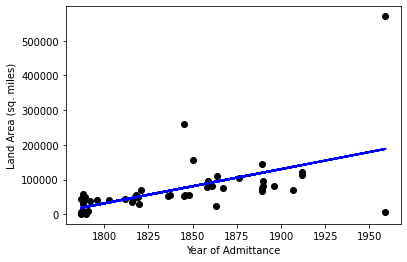

In [22]:
# create linear regression model
# create x and y
land = np.array(pd.to_numeric(df1['land area'] ,downcast = 'integer'))

y = land
x = np.reshape(np.array(df1["admittance_year"]),(-1,1))

#print (x,y)

lm = linear_model.LinearRegression()
fitresult = lm.fit(x,y)

# Make predictions
y_pred = fitresult.predict(x)

# The coefficients
print('Linear Coefficient (i.e. the value of m): \n', fitresult.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel('Year of Admittance')
plt.ylabel('Land Area (sq. miles)')

plt.show()

In [ ]:
# Clearly it makes little sense to include the last two data
# points in the regression (AK and HI) ... let's remove them and do
# the regression over again.

In [107]:
df1 = df1.drop([0, 1])

Coefficients: 
 [684.92161604]
Mean squared error: 1334322806.18
Coefficient of determination: 0.38


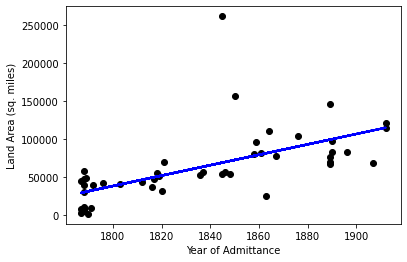

In [108]:
y = df1["land area"]
x = np.reshape(np.array(df1["admittance_year"]),(-1,1))

#print (x,y)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

# Make predictions
pred = model.predict(x)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, pred))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, pred, color='blue', linewidth=2)
plt.xlabel('Year of Admittance')
plt.ylabel('Land Area (sq. miles)')

plt.show()